<a href="https://colab.research.google.com/github/cm3155/final-proj/blob/main/Plant_Village_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and import packages

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd
from matplotlib import pyplot as plt
import keras
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, models

In [ ]:
train_dataset, info = tfds.load('plant_village', split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'], shuffle_files=True, as_supervised=True, with_info=True)
train_data, valid_data, test_data = train_dataset

Image Preprocessing

In [ ]:
print(len(train_data),len(valid_data),len(test_data)) #checking length of data to ensue correct upload

38012 8146 8145


In [ ]:
def preprocess_image(image, label):
      image = tf.image.resize(image, (128, 128)) #resize image to (128,128,3)
      image = tf.cast(image, tf.float32) / 255.0  #normalize image

      return image, label

train_data = train_data.map(lambda x, y: preprocess_image(x, y)) #apply preprocessing
valid_data = valid_data.map(lambda x, y: preprocess_image(x, y))
test_data = test_data.map(lambda x, y: preprocess_image(x, y))

#batching data using batch size = 64
train_data = train_data.batch(64)
valid_data = valid_data.batch(64)
test_data = test_data.batch(64)

In [ ]:
for images, labels in train_data.take(1): #check image and label size
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (64, 128, 128, 3)
Label batch shape: (64,)


# First Model (5-Layer architecture)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=30,validation_data=valid_data)

Evaluate Model

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Training Accuracy: {train_accuracy:.4f}")
valid_loss, valid_accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {valid_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

594/594 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.9973 - loss: 0.0093
Training Accuracy: 0.9973
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9371 - loss: 0.2477
Validation Accuracy: 0.9362
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9425 - loss: 0.2351
Test Accuracy: 0.9432


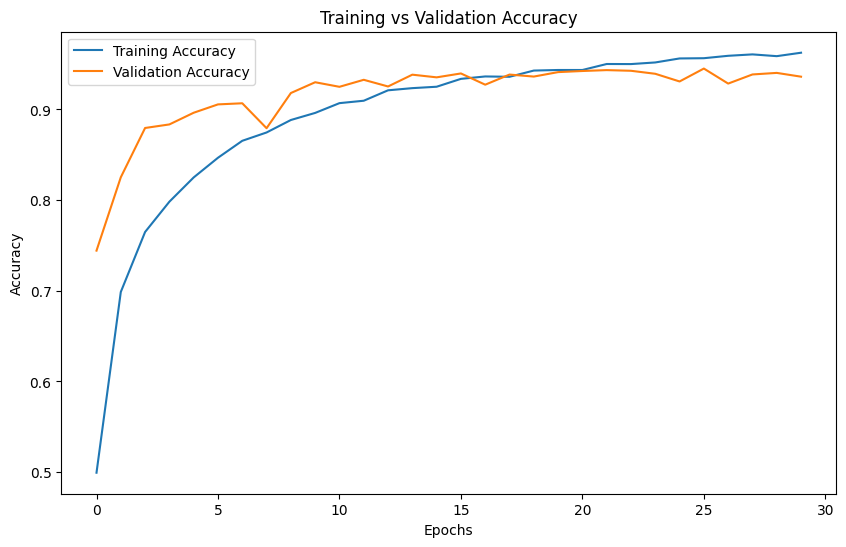

In [ ]:
# create plot of training accuracy vs validation accuracy over 30 epochs
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,928,628 (37.87 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,619,086 (25.25 MB)

# Second Model (8-Layer Architecture)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=30,validation_data=valid_data)

Evaluate Model

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Training Accuracy: {train_accuracy:.4f}")
valid_loss, valid_accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {valid_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

594/594 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9901 - loss: 0.0293
Training Accuracy: 0.9921
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9575 - loss: 0.1458
Validation Accuracy: 0.9583
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9596 - loss: 0.1457
Test Accuracy: 0.9599


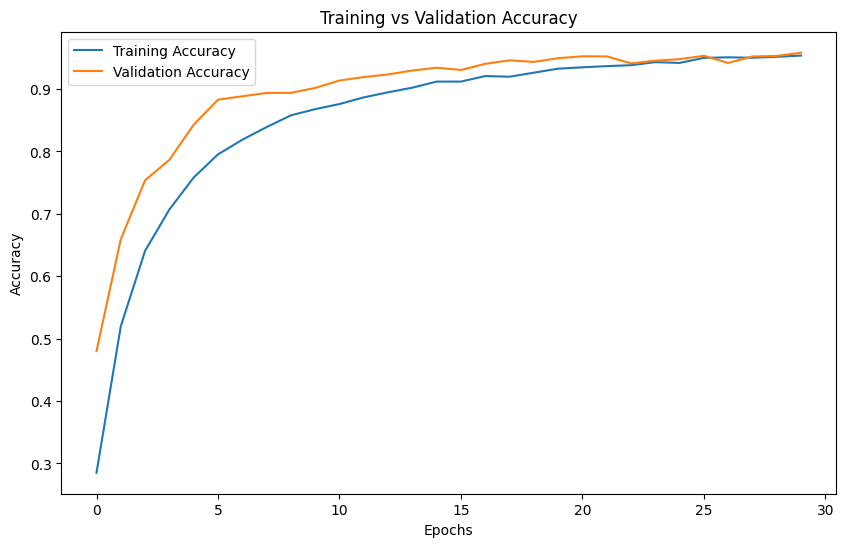

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 124, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,104,916 (8.03 MB)

 Trainable params: 701,638 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,403,278 (5.35 MB)

# LeNet Architecture

In [ ]:
LN_model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.AvgPool2D((2, 2)),

    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D((2, 2)),

    layers.Flatten(),

    layers.Dense(120, activation='relu'),

    layers.Dense(84, activation='relu'),

    layers.Dense(38, activation='softmax')

])

LN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = LN_model.fit(train_data, epochs=30, validation_data = valid_data)

In [ ]:
train_loss, train_accuracy = LN_model.evaluate(train_data)
print(f"Training Accuracy: {train_accuracy:.4f}")
valid_loss, valid_accuracy = LN_model.evaluate(valid_data)
print(f"Validation Accuracy: {valid_accuracy:.4f}")
test_loss, test_accuracy = LN_model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

594/594 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.9748 - loss: 0.0930
Training Accuracy: 0.9758
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8343 - loss: 1.1136
Validation Accuracy: 0.8383
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.8435 - loss: 1.0457
Test Accuracy: 0.8432


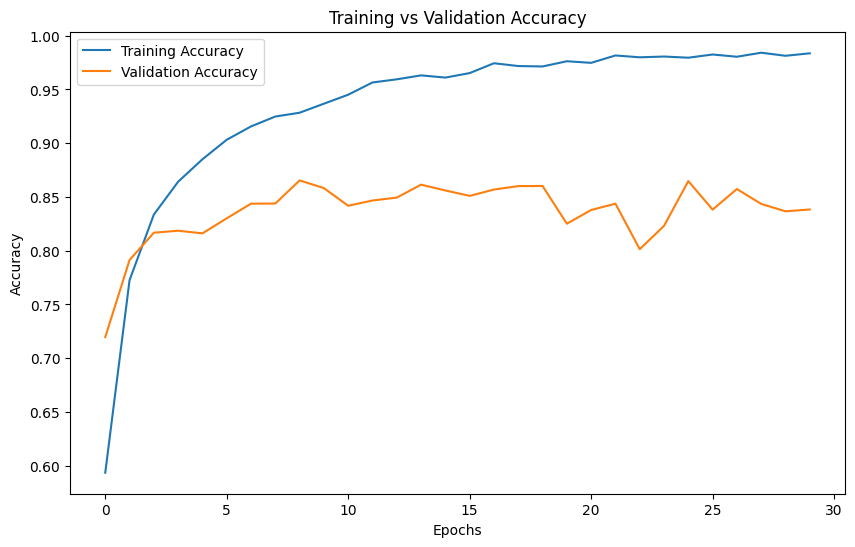

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
LN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 62, 62, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 58, 58, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 29, 29, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 13456)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       1,614,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           3,230 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,893,320 (18.67 MB)

 Trainable params: 1,631,106 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,262,214 (12.44 MB)

## VGG Models

## VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) #set training rate to 1e-5

def build_VGGModel(num_classes=38):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  #load VGG16 model without the top layers

    base_model.trainable = False  #freeze all layers of the VGG16 model

    model = models.Sequential()
    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation='relu')) #custom layers
    model.add(layers.Dropout(0.2)) #dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(38, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

VGGModel = build_VGGModel()

In [ ]:
history = VGGModel.fit(train_data, validation_data=valid_data, epochs=100)

In [48]:
train_loss, train_accuracy = VGGModel.evaluate(train_data)
print(f"Training Accuracy: {train_accuracy:.4f}")
valid_loss, valid_accuracy = VGGModel.evaluate(valid_data)
print(f"Validation Accuracy: {valid_accuracy:.4f}")
test_loss, test_accuracy = VGGModel.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

594/594 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.8940 - loss: 0.3886
Training Accuracy: 0.8954
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7799 - loss: 0.6949
Validation Accuracy: 0.7852
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.7910 - loss: 0.6720
Test Accuracy: 0.7913


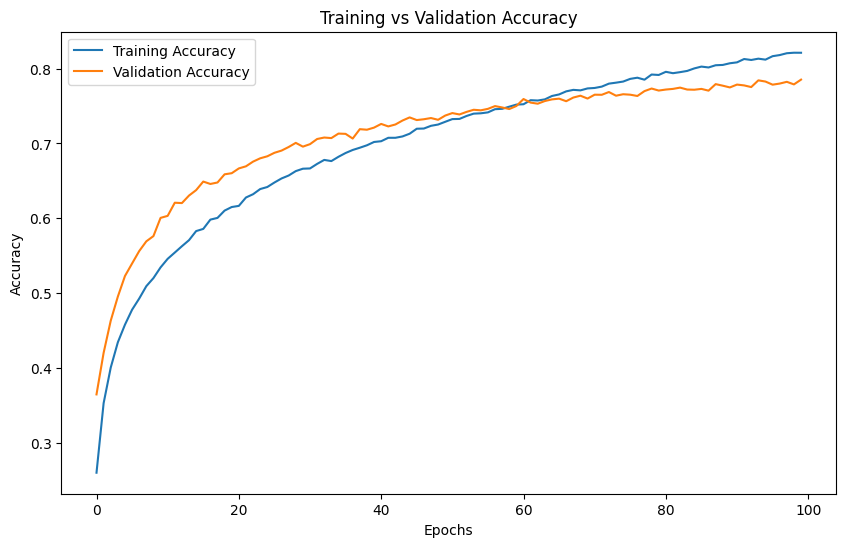

In [49]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [50]:
VGGModel.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,710,708 (288.81 MB)

 Trainable params: 25,236,902 (96.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,473,806 (192.54 MB)